### todo

#### EDA/munging: 
- Match up popsike's min/avg/max with discogs' quality ratings.
    - is there a statistically valid way to do this?
- visualize price data over time, test a few different averaging methods

#### MARKETPLACE & comparison:
- write script to pull marketplace data
    - convert currencies
- compare min/avg/max to metrics from marketplace
- visualize the available listings in the marketplace??

#### ML Model:
- keras?
- prophet?
- sklearn?
- build a couple models and try different methods for combining the data

#### Flask
- select record from dropdown list
- view available listings
- visualize price over time
- % certainty that this is a good purchase ?

#### Extra features:

- make scrapers save a list of what *didn't* get scraped
- make popsike scraper check only for non-existing data
- make both scrapers remove data that was removed from the wantlist (i.e purchased)


In [1]:
%run glue.py

In [2]:
# How many records have data successfully harvested from Discogs?
len(df_popsike['release_id'].unique())

183

In [3]:
len(df_discogs['release_id'].unique())

263

In [4]:
# amount of records we have in both dataframes
unique_ids = df_popsike[df_discogs['release_id'].isin(
        df_popsike['release_id']
    )]['release_id'].unique()
print(len(unique_ids))

176


/home/ken/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# NOTE NOTE NOTE NOTE TODO
# this doesn't actually work
df_both = df_popsike[df_discogs['release_id'].isin(df_popsike['release_id'])]

/home/ken/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df_both = df_both.reset_index()

In [71]:
# grab a random release and put it in a DataFrame
this_release = int(df_both.sample()['release_id'])
df_current = df_popsike[df_popsike['release_id'] == this_release].copy()

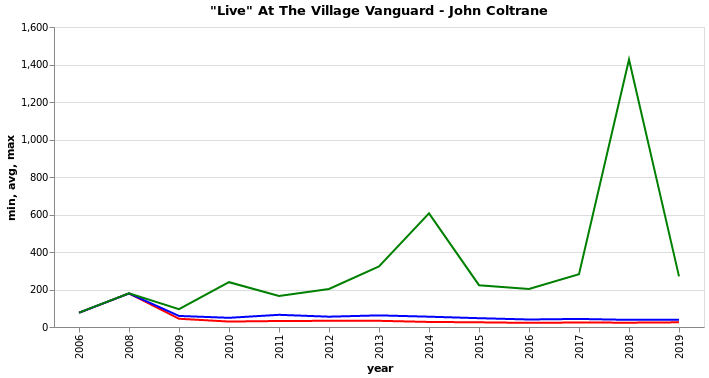

In [78]:
# chart min/avg/max
base = alt.Chart(df_current.reset_index(), width=650).encode(x='year:O').properties(
    title=df_current.iloc[0]['title'] + ' - ' +  df_current.iloc[0]['artist']
)

alt.layer(
    base.mark_line(color='red').encode(y='min:Q'),
    base.mark_line(color='blue').encode(y='avg:Q'),
    base.mark_line(color='green').encode(y='max:Q'),
).interactive()

In [25]:
# see what we found on popsike
df_popsike[df_popsike['release_id'] == this_release]

,release_id,year,title,artist,min,avg,max
1761,27129,2006,...I Care Because You Do,Aphex Twin,37,37,38
1762,27129,2008,...I Care Because You Do,Aphex Twin,153,153,154
1763,27129,2009,...I Care Because You Do,Aphex Twin,20,45,76
1764,27129,2010,...I Care Because You Do,Aphex Twin,32,48,93
1765,27129,2011,...I Care Because You Do,Aphex Twin,30,50,136
1766,27129,2012,...I Care Because You Do,Aphex Twin,33,57,136
1767,27129,2013,...I Care Because You Do,Aphex Twin,29,40,48
1768,27129,2014,...I Care Because You Do,Aphex Twin,27,40,71
1769,27129,2015,...I Care Because You Do,Aphex Twin,26,32,79
1770,27129,2016,...I Care Because You Do,Aphex Twin,28,35,62


In [26]:
# see what we found on discogs
df_discogs[df_discogs['release_id'] == this_release].sort_values(by='date')

,date,release_id,poor,fair,good,good_plus,vg,vg_plus,near_mint,mint
3541,2019-04-19,27129,5.415279,10.830558,16.245837,27.076394,48.737510,70.398625,92.059740,102.890298
2796,2019-05-01,27129,12.222075,24.444151,36.666226,61.110377,109.998678,158.886980,207.775281,232.219432
3050,2019-05-02,27129,12.222075,24.444151,36.666226,61.110377,109.998678,158.886980,207.775281,232.219432
4831,2019-05-03,27129,12.176471,24.352941,36.529412,60.882353,109.588235,158.294118,207.000000,231.352941
1528,2019-05-04,27129,12.222075,24.444151,36.666226,61.110377,109.998678,158.886980,207.775281,232.219432
5087,2019-05-05,27129,12.222075,24.444151,36.666226,61.110377,109.998678,158.886980,207.775281,232.219432
760,2019-05-07,27129,12.222075,24.444151,36.666226,61.110377,109.998678,158.886980,207.775281,232.219432
5602,2019-05-09,27129,12.313285,24.626570,36.939855,61.566424,110.819564,160.072703,209.325843,233.952412
504,2019-05-10,27129,12.313285,24.626570,36.939855,61.566424,110.819564,160.072703,209.325843,233.952412
2043,2019-05-11,27129,12.222075,24.444151,36.666226,61.110377,109.998678,158.886980,207.775281,232.219432


In [28]:
df_current

,release_id,year,title,artist,min,avg,max
1761,27129,2006,...I Care Because You Do,Aphex Twin,37,37,38
1762,27129,2008,...I Care Because You Do,Aphex Twin,153,153,154
1763,27129,2009,...I Care Because You Do,Aphex Twin,20,45,76
1764,27129,2010,...I Care Because You Do,Aphex Twin,32,48,93
1765,27129,2011,...I Care Because You Do,Aphex Twin,30,50,136
1766,27129,2012,...I Care Because You Do,Aphex Twin,33,57,136
1767,27129,2013,...I Care Because You Do,Aphex Twin,29,40,48
1768,27129,2014,...I Care Because You Do,Aphex Twin,27,40,71
1769,27129,2015,...I Care Because You Do,Aphex Twin,26,32,79
1770,27129,2016,...I Care Because You Do,Aphex Twin,28,35,62


In [29]:
import altair as alt
from vega_datasets import data

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')